# **Project 4   -   Wrange and Analyze WeRateDogs**

Manuel Gajardo                                         
megajardom@gmail.com                           
Mar 9th, 2021

# **Introduction**

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking these aforementioned laws.

As of December 2020, the Twitter account has nearly 9 million followers,[5] and Nelson sees 30,000 likes on a post as being viral.[1] His most popular post was of a dog marching in the 2017 Women's March, which was retweeted more than 50,000 times and favorited 134,000 times.[1]

The account's language has spawned an Internet language about "**doggos**" and "**puppers**".[6] A 2016 interaction with another Twitter user, when Nelson purposefully misnamed him "Brent" as is common in Weird Twitter, spawned the catchphrase "They're good dogs, Brent", which became one of the biggest memes of 2016.                         
https://en.wikipedia.org/wiki/WeRateDogs


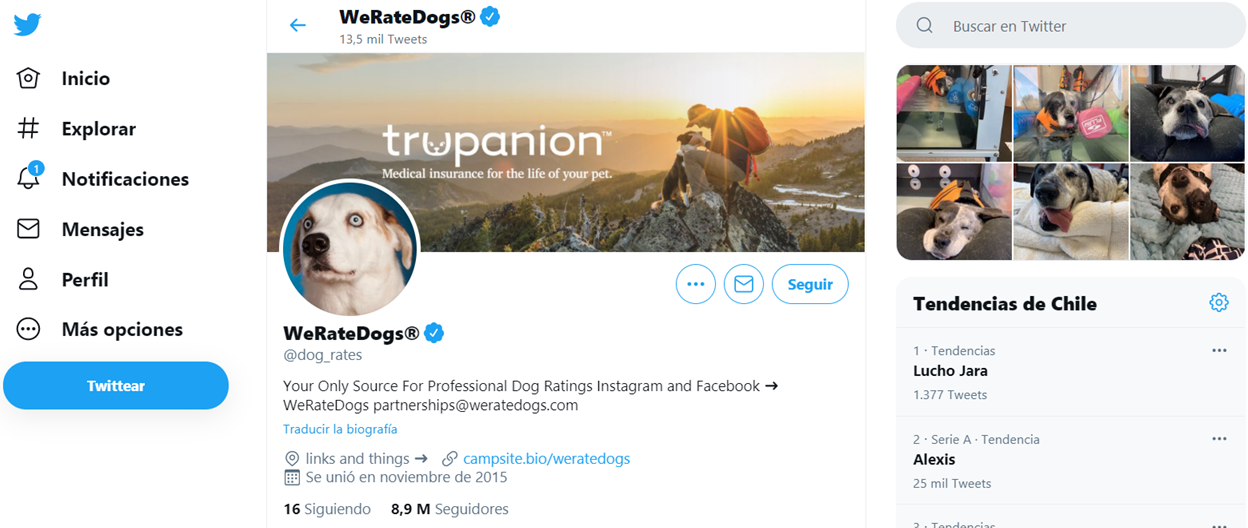

# **Project details**            
**Data wrangling WeRateDogs consider the following process**             

*   Gathering data                    
*   Assessing data             
*   Cleaning data
*   Storing, analyzing, and visualizing wrangled data
*   Reporting on  data wrangling efforts and data analyses and visualizations

# **Gathering Data**

In [2]:
# importing libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import tweepy
import time
import datetime

In [3]:
# Connecting collab with drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# loading the csv file
df_twit_archive = pd.read_csv('/content/drive/MyDrive/twitter-archive-enhanced.csv')

In [5]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
# loading the image-predictions.tsv file using provided url.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [7]:
# making a dataframe with the contents of the tsv file 
df_image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [8]:
# verifying loading succesfull
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [ ]:
# saving dataframe
df_image_pred.to_csv('/content/drive/MyDrive/df_image_pred.csv')

In [ ]:
#  conecting to tweeter with my credencials
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
#   reading json file
for tweet_id in df_twit_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'a+') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print (tweet_id, 'success')
    except:
        print (tweet_id, 'Failed')

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888202515573088257 Failed
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 success
885518971528720385 success
885311592912609280 success
88

Rate limit reached. Sleeping for: 730


758474966123810816 success
758467244762497024 success
758405701903519748 success
758355060040593408 success
758099635764359168 success
758041019896193024 success
757741869644341248 success
757729163776290825 success
757725642876129280 success
757611664640446465 success
757597904299253760 success
757596066325864448 success
757400162377592832 success
757393109802180609 success
757354760399941633 success
756998049151549440 success
756939218950160384 success
756651752796094464 success
756526248105566208 success
756303284449767430 success
756288534030475264 success
756275833623502848 success
755955933503782912 success
755206590534418437 success
755110668769038337 success
754874841593970688 success
754856583969079297 success
754747087846248448 success
754482103782404096 success
754449512966619136 success
754120377874386944 success
754011816964026368 Failed
753655901052166144 success
753420520834629632 success
753398408988139520 success
753375668877008896 success
753298634498793472 success
75

Rate limit reached. Sleeping for: 731


676975532580409345 success
676957860086095872 success
676949632774234114 success
676948236477857792 success
676946864479084545 success
676942428000112642 success
676936541936185344 success
676916996760600576 success
676897532954456065 success
676864501615042560 success
676821958043033607 success
676819651066732545 success
676811746707918848 success
676776431406465024 success
676617503762681856 success
676613908052996102 success
676606785097199616 success
676603393314578432 success
676593408224403456 success
676590572941893632 success
676588346097852417 success
676582956622721024 success
676575501977128964 success
676533798876651520 success
676496375194980353 success
676470639084101634 success
676440007570247681 success
676430933382295552 success
676263575653122048 success
676237365392908289 success
676219687039057920 success
676215927814406144 success
676191832485810177 success
676146341966438401 success
676121918416756736 success
676101918813499392 success
676098748976615425 success
6

In [ ]:
#  Now I am creating new dataframe
#  https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

df_list_tweet = []
with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list_tweet.append({'favorites': tweet_line['favorite_count'],
                       'retweets': tweet_line['retweet_count'],
                       'followers_count': tweet_line['user']['followers_count'],
                       'tweet_id': tweet_line['id']})

df_twitter = pd.DataFrame(df_list_tweet)

In [9]:
# loading json file from drive,  only to use for avoid connect to API twitter
#                 ============================================

df_twitter = pd.read_csv('/content/drive/MyDrive/df_twitter.csv')

In [10]:
df_twitter

,Unnamed: 0,favorites,retweets,followers_count,tweet_id
0,0,34993,7343,8978359,892420643555336193
1,1,30299,5479,8978359,892177421306343426
2,2,22791,3623,8978359,891815181378084864
3,3,38259,7532,8978359,891689557279858688
4,4,36535,8113,8978359,891327558926688256
...,...,...,...,...,...
2325,2325,93,38,8978376,666049248165822465
2326,2326,259,122,8978376,666044226329800704
2327,2327,107,39,8978376,666033412701032449
2328,2328,117,41,8978376,666029285002620928


In [ ]:
#saving to drive
df_twitter.to_csv('/content/drive/MyDrive/df_twitter.csv')

In [ ]:
#  Here we made three dataframe
#  df_twit_archive (from twitter-archive-enhanced.csv )
#  df_twitter      (from tweet_json.txt )
#  df_image_pred   (from image_predictions.tsv )


# ***Assessing Data***          

Making analysis of quality data

In [ ]:
df_twit_archive.duplicated().sum()

0

In [ ]:
df_twit_archive['tweet_id'].duplicated().sum()

0

In [ ]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
df_image_pred.duplicated().sum()

0

In [ ]:
df_image_pred['tweet_id'].duplicated().sum()

0

In [ ]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   favorites        2330 non-null   int64
 1   retweets         2330 non-null   int64
 2   followers_count  2330 non-null   int64
 3   tweet_id         2330 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [ ]:
df_twitter.duplicated().sum()

0

In [ ]:
df_twitter['tweet_id'].duplicated().sum()

0

# ***Cleaning data***

In [11]:
# making copies for more secure process
# "deep=True" sentence ensure that the new dataframe will not afected to the original
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

df_twit_archive_2 = df_twit_archive.copy(deep=True)
df_image_pred_2   = df_image_pred.copy(deep=True)
df_twitter_2      = df_twitter.copy(deep=True)

# **Quality Issues**

**Issue #1**
Changing some values to make the column more readable
-----------------------------------------------------

In [12]:
df_twit_archive_2['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Code**

In [13]:
# replacing values
df_twit_archive_2['source'] = df_twit_archive_2['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_twit_archive_2['source'] = df_twit_archive_2['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
df_twit_archive_2['source'] = df_twit_archive_2['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_twit_archive_2['source'] = df_twit_archive_2['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

**Test**

In [14]:
# Now the result,  column more clean and readable
df_twit_archive_2['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Issue #2**   
Changing timestamp column to datetime type for merge later to a new dataframe
--------------------------------------------------------------------

In [27]:
df_twit_archive_2['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

**Code**

In [28]:
df_twit_archive_2['timestamp'] = pd.to_datetime(df_twit_archive_2['timestamp'])

**Test**

In [29]:
#  column changed are ready to merge
df_twit_archive_2['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

**Issue #3**   
Dropping column not relevant in this analysis
------------------------------------------------

In [18]:
df_twit_archive_2.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

**Code**

In [19]:
df_twit_archive_2.drop(columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)


**Test**

In [30]:
df_twit_archive_2.count()

tweet_id              2356
timestamp             2356
source                2356
text                  2356
expanded_urls         2297
rating_numerator      2356
rating_denominator    2356
name                  1502
doggo                   97
floofer                 10
pupper                 257
puppo                   30
dtype: int64

**Issue #4**   
Correcting names in tweet, some data is incorrect 
-------------------------------------------------

**Code**

In [31]:
df_twit_archive_2.loc[df_twit_archive_2['name'].str.islower() == True, 'name'] = 'None'


In [32]:
df_twit_archive_2.replace('None', np.NaN, inplace = True)


In [33]:
df_twit_archive_2[df_twit_archive['name'].str.islower() == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,NaN,NaN,NaN,NaN
56,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,NaN,NaN,pupper,NaN
118,869988702071779329,2017-05-31 18:47:24+00:00,Twitter for iPhone,RT @dog_rates: We only rate dogs. This is quit...,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN,NaN,NaN,NaN
169,859196978902773760,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN,NaN,NaN,NaN
193,855459453768019968,2017-04-21 16:33:22+00:00,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,NaN,NaN,NaN
2350,666050758794694657,2015-11-16 00:30:50+00:00,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN


**Test**

In [34]:
df_twit_archive_2['name'].value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
           ..
Dallas      1
River       1
Barclay     1
Ralf        1
Billy       1
Name: name, Length: 931, dtype: int64

**Issue #5**  
Removing underscores in image descriptions
----------------------------------------------

In [35]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Code**

In [36]:
df_image_pred['p1'] = df_image_pred['p1'].str.replace('_', ' ')


In [37]:
# replacing character
df_image_pred['p2'] = df_image_pred['p2'].str.replace('_', ' ')
df_image_pred['p3'] = df_image_pred['p3'].str.replace('_', ' ')

df_image_pred['p1'] = df_image_pred['p1'].str.title()
df_image_pred['p2'] = df_image_pred['p2'].str.title()
df_image_pred['p3'] = df_image_pred['p3'].str.title()


**Test**

In [38]:
# verifing
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


**Issue #6**   
Removing duplicates in json file
-------------------------------------

**Code**

In [39]:
df_twitter.drop_duplicates(inplace = True)

**Test**

In [40]:

df_twitter[df_twitter['tweet_id'].duplicated()]

,Unnamed: 0,favorites,retweets,followers_count,tweet_id


**Issue #7**   
# Making the dog names format consistent.                 
Using capitalize funtion to capitalize first letter of each names


**Code**

In [41]:
#  using "capitalize" to make the first letter capital
#  https://stackoverflow.com/questions/1549641/how-can-i-capitalize-the-first-letter-of-each-word-in-a-string

df_twit_archive_2['name'] = df_twit_archive_2.name.str.capitalize()


**Test**

In [42]:
df_twit_archive_2['name'].str.islower().sum()

0

In [43]:
df_twit_archive_2['name'].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

**Issue #8**  
# Droping duplicated values from jpg_url in ***df_image_pred*** file

**Code**

In [44]:
sum(df_image_pred_2.jpg_url.duplicated())


66

In [45]:
df_image_pred_2 = df_image_pred_2.drop_duplicates(subset=['jpg_url'], keep='first')

**Test**

In [46]:
# Verifying clean process
sum(df_image_pred_2.jpg_url.duplicated())

0

**Issue #9**  
# Reemplacing None dog's names

**Code**

In [47]:
clear_list = list(df_twit_archive_2.query('name == "a" or name == "an"').index)
for i in clear_list:     
    df_twit_archive_2.name[i] = "None"

In [48]:
# Nothing should be printed
for i in clear_list:
    if df_twit_archive_2.name[i] != "None":
        print("wrong name")

# **Tidiness Issues**

1.  There are four columns indicating the stage of life for a dog,  I will transform in only one.
2.  Create a new dataframe from df_twit_archive_2 , df_image_pred_2 and   
df_twitter_2  called twitter_archive_master.csv

**Tidiness issue #1**   
# Replacing with a single column different stages_dog
------------------------------------------


**Code**

In [49]:
df_twit_archive_2['stages']= df_twit_archive_2.text.str.findall('(doggo|pupper|puppo|floofer)')
df_twit_archive_2['stages']=df_twit_archive_2['stages'].apply(lambda x: ','.join(set(x)))

In [50]:
df_twit_archive_2['stages']=df_twit_archive_2['stages'].replace('',np.nan)

In [51]:
df_twit_archive_2.drop(df_twit_archive_2[['doggo','puppo','pupper','floofer']],axis=1,inplace=True)

**Test**

In [52]:
df_twit_archive_2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


**Tidiness issue #2**                    
# Creating a new dataframe from df_twit_archive_2, df_image_pred_2 and df_twitter_2.                                             
**I will name twitter_archive_master.csv**

**Code**

In [53]:
df_master = df_twit_archive_2.merge(df_image_pred_2,how='inner',on='tweet_id')

In [54]:
df_master = df_master.merge(df_twitter_2,how='left',on='tweet_id')

**Test**

In [55]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorites,retweets,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.0,34993.0,7343.0,8978359.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.0,30299.0,5479.0,8978359.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2.0,22791.0,3623.0,8978359.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,3.0,38259.0,7532.0,8978359.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,4.0,36535.0,8113.0,8978359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2325.0,93.0,38.0,8978376.0
2005,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2326.0,259.0,122.0,8978376.0
2006,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2327.0,107.0,39.0,8978376.0
2007,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2328.0,117.0,41.0,8978376.0


In [63]:
#  saving to disk
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

**Insight #1**                                
The most frequent breed of dog

In [56]:
df_master['p1'].value_counts()[0:10]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    55
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: p1, dtype: int64

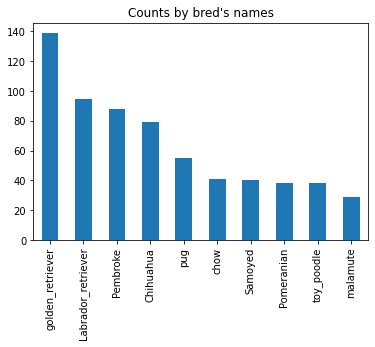

In [84]:
df_master['p1'].value_counts()[0:10].plot(x="bred",y='favorite_count',kind='bar',title="Counts by bred's names")

**Insight #2**                          
The most frequent device where people is connecting

In [57]:
df_master['source'].value_counts()

Twitter for iPhone    1968
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

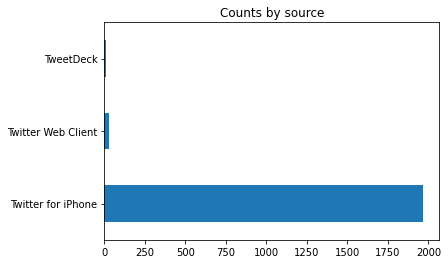

In [85]:
df_master['source'].value_counts().plot(x="size",y='favorite_count',kind='barh',title="Counts by source")

**Insight #3**                            
The most frequent stages of dogs are

In [58]:
df_master['stages'].value_counts()

pupper          224
doggo            66
puppo            26
pupper,doggo      8
floofer           3
puppo,doggo       2
Name: stages, dtype: int64

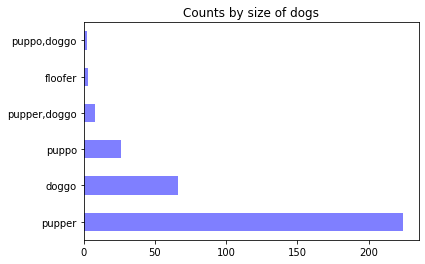

In [66]:
df_master['stages'].value_counts().plot(x="size",y='favorite_count',kind='barh',title="Counts by size of dogs",color='b', alpha=0.5)

**Insight #4**                       
The less frequent dog's bred

In [59]:
df_master['p1'].value_counts().tail(10)

canoe           1
terrapin        1
cheeseburger    1
cliff           1
swab            1
school_bus      1
ibex            1
pitcher         1
beaver          1
hummingbird     1
Name: p1, dtype: int64

# Visualization

In [60]:
dog_names_list = df_master['name'].value_counts().head(15)
dog_names_list

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Toby        7
Lola        7
Daisy       7
Jax         6
Stanley     6
Bo          6
Bella       6
Name: name, dtype: int64

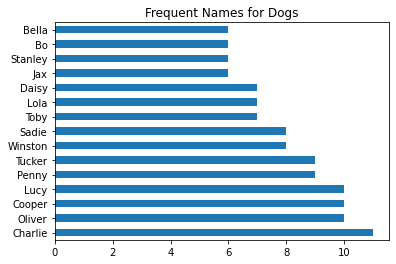

In [87]:
dog_names_list.plot(x="count", kind='barh', title = 'Frequent Names for Dogs');

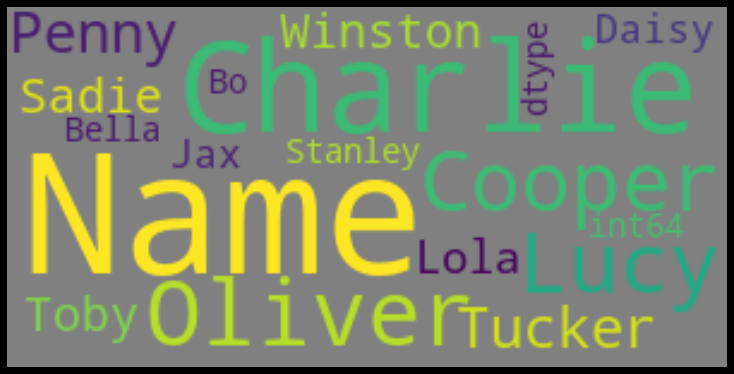

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = dog_names_list
wordcloud = WordCloud(
    width = 300,
    height = 150,
    background_color = 'gray',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Insight #5**                       
Rating v/s Retweet relationship

In [88]:
df_master.drop(index=list(df_master.query('rating_numerator>=20').index),inplace=True)

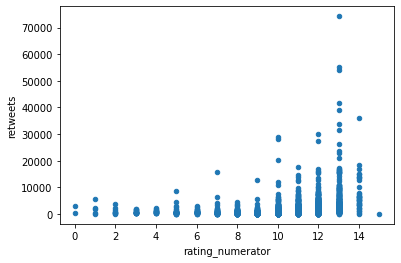

In [91]:
df_master.plot(x='rating_numerator',y='retweets',kind='scatter');